Loading the file and creatinf data frame

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sb
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\anzhali\Downloads\filesel20220210083224.csv.csv", dtype={'$ Paid': str})
print(df.shape)
print(list(df))
df[['$ Shipped', '$ Adjustments', '$ Due']] = df[['$ Shipped', '$ Adjustments', '$ Due']].astype(str)
df.sample(5).transpose()

C:\Users\anzhali\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (14,20,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(35052, 33)
['Subscription ID', 'Collection', 'Source', 'Offer', 'Status', 'Order Date', 'Last Ship Date', '# Shipments', '# SKUs Shipped', '$ Shipped', '# Returned', '$ Paid', '$ Adjustments', '$ Due', 'Upsell', 'Frequency', 'Dun Level', 'Last Payment', 'Payment Type', 'AutoBill', 'Last Statement', 'Cancel Date', 'Cancel Reason', 'Chargeback', '# Declined', 'Intro $', 'Intro S&H $', 'Quantity', 'Back Ordered', 'State', ' ', 'Unnamed: 31', 'Unnamed: 32']


,9089,34016,1049,10257,10948
Subscription ID,26581600001,37562270001,10985490001,27266390001,27765480501
Collection,Star Trek Starships,Star Trek Starships,Star Trek Starships,Star Trek Starships,Star Trek Starships
Source,ST022FBR8AN,ST052FBD0,ST001CCK0AN,ST011WPFGAN,ST510WPIEAN
Offer,ST022,ST052,ST001,ST011,ST501
Status,C,C,R,M,C
Order Date,9/23/2018,11/7/2020,11/23/2014,10/8/2016,3/8/2019
Last Ship Date,9/24/2018,12/8/2020,11/24/2014,11/11/2016,4/30/2019
# Shipments,1,2,1,1,1
# SKUs Shipped,2,3,1,1,6
$ Shipped,14.93,49.75,4.95,21.0,42.95


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35052 entries, 0 to 35051
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Subscription ID  35052 non-null  int64  
 1   Collection       35052 non-null  object 
 2   Source           35052 non-null  object 
 3   Offer            34167 non-null  object 
 4   Status           31812 non-null  object 
 5   Order Date       35052 non-null  object 
 6   Last Ship Date   32193 non-null  object 
 7   # Shipments      35052 non-null  int64  
 8   # SKUs Shipped   35052 non-null  int64  
 9   $ Shipped        35052 non-null  object 
 10  # Returned       35052 non-null  int64  
 11  $ Paid           35052 non-null  object 
 12  $ Adjustments    35052 non-null  object 
 13  $ Due            35052 non-null  object 
 14  Upsell           249 non-null    object 
 15  Frequency        35052 non-null  int64  
 16  Dun Level        21222 non-null  float64
 17  Last Payment

Data preparation for future analysis 

In [4]:
df['$ Paid'] = df['$ Paid'].map(lambda x: x.lstrip('$').rstrip('aAbBcC'))
df['$ Shipped'] = df['$ Shipped'].map(lambda x: x.lstrip('$').rstrip('aAbBcC'))
df['$ Adjustments'] = df['$ Adjustments'].map(lambda x: x.lstrip('$').rstrip('aAbBcC'))
df['$ Due'] = df['$ Due'].map(lambda x: x.lstrip('$').rstrip('aAbBcC'))

In [5]:
df['$ Paid'] = df['$ Paid'].str.replace(',','').str.replace('$','').astype('float')
df['$ Shipped'] = df['$ Shipped'].str.replace(',','').str.replace('$','').astype('float')
df['$ Adjustments'] = df['$ Adjustments'].str.replace(',','').str.replace('$','').astype('float')
df['$ Due'] = df['$ Due'].str.replace(',','').str.replace('$','').astype('float')

C:\Users\anzhali\AppData\Local\Temp/ipykernel_22316/2711854551.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['$ Paid'] = df['$ Paid'].str.replace(',','').str.replace('$','').astype('float')
C:\Users\anzhali\AppData\Local\Temp/ipykernel_22316/2711854551.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['$ Shipped'] = df['$ Shipped'].str.replace(',','').str.replace('$','').astype('float')
C:\Users\anzhali\AppData\Local\Temp/ipykernel_22316/2711854551.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['$ A

i. The average revenue per subscriber (in USD)

In [6]:
df['$ Paid'].agg(['mean'])

mean    537.401603
Name: $ Paid, dtype: float64

Average revenue per subscriber is 537 $

ii. The median refund per subscriber (in USD)

In [7]:
df['$ Adjustments'].agg(['mean'])

mean    1.457555
Name: $ Adjustments, dtype: float64

Median refund per subscriber is 1.45 $

iii. The offer code that generates the most revenue

In [8]:
k = df[['Offer', '$ Paid']].groupby(['Offer']).agg(['sum'])


In [9]:
k.max()

$ Paid  sum    7901802.05
dtype: float64

The offer code that generated most revenue is ST007 with revenue of 7,901,802 $

iv. The % cancellation rate for the whole collection

In [10]:
df.groupby(['Status']).agg(['count'])

,Subscription ID,Collection,Source,Offer,Order Date,Last Ship Date,# Shipments,# SKUs Shipped,$ Shipped,# Returned,...,Chargeback,# Declined,Intro $,Intro S&H $,Quantity,Back Ordered,State,,Unnamed: 31,Unnamed: 32
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
Status,,,,,,,,,,,,,,,,,,,,,
C,25757,25757,25757,24872,25757,23193,25757,25757,25757,25757,...,25757,25757,25757,25757,25757,25757,25756,25756,0,1
E,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
M,572,572,572,572,572,572,572,572,572,572,...,572,572,572,572,572,572,572,572,0,0
R,5069,5069,5069,5069,5069,4928,5069,5069,5069,5069,...,5069,5069,5069,5069,5069,5069,5069,5069,0,0
S,169,169,169,169,169,166,169,169,169,169,...,169,169,169,169,169,169,169,169,0,0
W,244,244,244,244,244,244,244,244,244,244,...,244,244,244,244,244,244,244,244,0,0


In [11]:
cancellation_rate = (25757 * 100) / 35052
cancellation_rate

73.48225493552437

Cancelation rate for the whole collection is 73.48 %

They believe that backorders (i.e. orders on hold due to out-of-stock items) are causing
cancelations on this subscription program. Using the dataset and the statistical method of your
choice, determine whether there is a “link” (to be defined as you please, e.g. correlation)
between backorders (column AK ‘Back Ordered’ = Y) and cancelations (column E ‘Status’ = C).

Transforming variable to numerical values in order to perform correlation tests.


In [12]:
df['cancelled'] = df['Status'] == 'C'
df['b_ordered'] = df['Back Ordered'] == 'Y'

In [13]:
df['cancelled'].value_counts()

True     25757
False     9295
Name: cancelled, dtype: int64

In [14]:
%matplotlib inline

import pandas as pd
import seaborn as sb
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, confusion_matrix


I am going to calculate covarience first and see if there any positive or negative relationship between variables.

In [15]:
from numpy.random import randn
from numpy.random import seed
from numpy import cov
# seed random number generator
seed(1)
# prepare data
data1 = df['cancelled']
data2 = df['b_ordered']
# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[0.19486393 0.0986607 ]
 [0.0986607  0.24249996]]


Covarience of 0.098 shows that there is a positive relation between 2 variable, in other words variable change in the same direction. I will calculate correlation now to better estimate level of dependance.


In [16]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = df['cancelled']
data2 = df['b_ordered']
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.454


Indeed, these 2 variable have high positive correlation between each other - whenever order is cancelled there is a high chance it was back ordered as well.


Text(0, 0.5, 'Frequency')

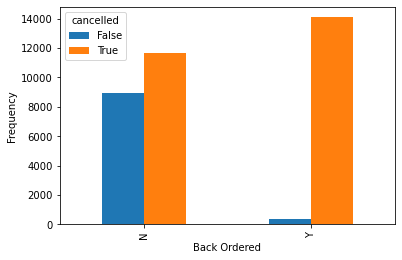

In [17]:
pd.crosstab(df['Back Ordered'], df.cancelled).plot(kind='bar')
plt.xlabel('Back Ordered')
plt.ylabel('Frequency')

This is a visual representation of correlation. Clearly there is a very strong connection between items being cancelled and being back ordered. As we can see from the plot above when the order is cancelled it is back odrered most of the time.

Using the same dataset “filesel20220210083224” and your own understanding of our
subscription businesses, explain what additional variables (i.e. other than backorders) would be
relevant in analyzing causes for subscriber cancelations. Those can include data listed on the
spreadsheet and/or not included in this dataset. 

Before I do that I will need to break each category into a series of binary features for each of the categorical features I'd like to include.  For continuous features, I'll have to ensure each row I'd like to include has a valid value.

In [22]:
####################################################################        
# Categorical features

all_features = []
categorical_features = ['Offer', 'Payment Type',  'State']
top = 10

for each_feature in categorical_features:
    for f in df[each_feature].value_counts().index[:top].tolist():
        df[each_feature+'='+str(f)] = (df[each_feature]==f)*1
        all_features.append(each_feature+'='+str(f))

        
####################################################################        
 # Adding a constant
df['constant'] = 1
all_features.append('constant')
    
    


In [19]:
%matplotlib inline

import pandas as pd
import seaborn as sb
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, confusion_matrix

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

  
# the independent variables set
X = df[all_features]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["cancelled"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                                 cancelled         VIF
0                              Offer=ST501    2.213209
1                              Offer=ST007    2.223555
2                              Offer=ST010    1.509465
3                              Offer=ST008    1.462485
4                              Offer=ST001    1.424609
5                              Offer=ST012    1.184983
6                              Offer=ST006    1.154113
7                              Offer=ST011    1.092493
8                              Offer=ST050    1.150812
9                              Offer=ST055    1.134294
10  Payment Type=US Visa                     28.533812
11        Payment Type=U     -- UNKNOWN **   25.592416
12  Payment Type=US MasterCard               16.177681
13  Payment Type=Sticky Visa                 14.428257
14  Payment Type=US PayPal                   11.813599
15  Payment Type=Sticky MasterCard            7.121154
16  Payment Type=US American Express          4.485509
17  Paymen

Most payment types are highly correlated so I will remove this feature.

In [24]:
all_features = []
categorical_features = ['Offer', 'State'] 
top = 10

for each_feature in categorical_features:
    for f in df[each_feature].value_counts().index[:top].tolist():
        df[each_feature+'='+str(f)] = (df[each_feature]==f)*1
        all_features.append(each_feature+'='+str(f))

In [25]:
# the independent variables set
X = df[all_features]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["cancelled"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

      cancelled       VIF
0   Offer=ST501  1.242565
1   Offer=ST007  1.250872
2   Offer=ST010  1.074100
3   Offer=ST008  1.078971
4   Offer=ST001  1.048992
5   Offer=ST012  1.025345
6   Offer=ST006  1.016153
7   Offer=ST011  1.015891
8   Offer=ST050  1.012234
9   Offer=ST055  1.011659
10     State=CA  1.161018
11     State=TX  1.120857
12     State=FL  1.100921
13     State=NY  1.082540
14     State=OH  1.056172
15     State=PA  1.054928
16     State=WA  1.052746
17     State=IL  1.053271
18     State=VA  1.048420
19     State=MI  1.045908


All features are without correlation. Now Iwill explore continuos features. 

<AxesSubplot:>

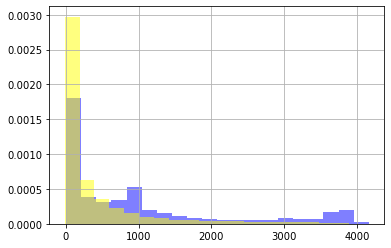

In [26]:
potential_feature = '$ Paid'
df.loc[(df['cancelled']==0), potential_feature].hist(bins=20, alpha=.5, density=True, color='blue')
df.loc[(df['cancelled']==1), potential_feature].hist(bins=20, alpha=.5, density=True, color='yellow')

This feature could  be used as well.

In [27]:
continuous_features = ['$ Paid']
for each_feature in continuous_features:
    all_features.append(each_feature)

In [28]:
df["cancelled"] = df["cancelled"].astype(int)

In [29]:
logit = sm.Logit(df["cancelled"], df[all_features])
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.520920
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              cancelled   No. Observations:                35052
Model:                          Logit   Df Residuals:                    35031
Method:                           MLE   Df Model:                           20
Date:                Wed, 23 Mar 2022   Pseudo R-squ.:                 0.09938
Time:                        20:06:34   Log-Likelihood:                -18259.
converged:                       True   LL-Null:                       -20274.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Offer=ST501     1.5279      0.029     52.362      0.000       1.471       1.585
Offer=ST007     1.6480    

I am also going to take the exponential of each of the coefficients to generate the odds ratios. This tells how a 1 unit increase or decrease in a variable affects the odds of order being 'cancelled'.

In [30]:
np.exp(result.params)

Offer=ST501     4.608559
Offer=ST007     5.196351
Offer=ST010     2.658569
Offer=ST008     9.247093
Offer=ST001     2.373751
Offer=ST012     2.687592
Offer=ST006    25.031000
Offer=ST011     0.059103
Offer=ST050     2.383100
Offer=ST055     1.263912
State=CA        1.637534
State=TX        1.633432
State=FL        1.552556
State=NY        2.052860
State=OH        1.366864
State=PA        1.468949
State=WA        1.640967
State=IL        1.324794
State=VA        1.526851
State=MI        1.302913
$ Paid          0.999120
dtype: float64

A lot of these coefficients are too high so ideally In would exclude some of them. However, teh question was what variable could be used to determine order cancellation and clearly 'Offer', 'State', and 'Paid' variables would be relevent in analizing that. Just to confirm I am going to calculate Logistic regression's accuracy. 

In [31]:
X = df[all_features].values
y = df['cancelled'].values

In [32]:
clf = LogisticRegression(random_state=20191016).fit(X, y)
print('The accuracy of our model is %0.1f%%' % (clf.score(X, y)*100))

The accuracy of our model is 76.8%


Our model accuracy is 76.8 what is concidered acceptable. Therefore, 'Offer', 'State', and 'Paid' variables would be relevent in analizing cancellations. Ideally I would not include all subcategories of them and try to rerun the model again to exclude bias. 